# AutoEncoder
---
自动编码器的主要应用有两个方面，第一是**数据去噪**，第二是进行**可视化降维**。自动编码器还有一个功能，即**生成数据**。

编码器和解码器可以是任意模型，通常使用神经网络模型作为编码器和解码器。

输入的数据经过神经网络降维到一个编码(code)，接着通过另外一个网络剧解码得到一个和输入原数据一模一样的生成数据，然后通过比较这两个数据，最小化它们之间的差异来训练这个网络中编码器和解码器的参数。

当这个过程训练完后，拿出这个解码器，随机传入一个编码(code)，通过解码器能够生成一个和原数据差不多的数据，

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cudAvl = lambda x : x.cuda() if torch.cuda.is_available() else x

In [3]:
class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Tanh()
        )
    
    def forward(self, x):
        code = self.encoder(x)
        imgTensor = self.decoder(code)
        return code, imgTensor
    
    def encode(self, x):
        return self.encoder(x)
    
    def decode(self, x):
        return self.decoder(x)

In [4]:
net = autoencoder()
net = cudAvl(net)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [5]:
import csv

with open('train.csv') as f :
    lines = csv.reader(f)
    label, attr = [], []
    for line in lines :
        if lines.line_num == 1 :
            continue
        label.append(int(line[0]))
        attr.append([float(j) for j in line[1:]])
print(len(label), len(attr[1]))

42000 784


In [6]:
digTensor = torch.FloatTensor(attr)
digTensor = digTensor / 255.0
digTensor.shape

torch.Size([42000, 784])

epoch [100/1500]: 0.060638703405857086
epoch [200/1500]: 0.054529376327991486
epoch [300/1500]: 0.04719305410981178
epoch [400/1500]: 0.04337755963206291
epoch [500/1500]: 0.04141037538647652
epoch [600/1500]: 0.04016782343387604
epoch [700/1500]: 0.03903444856405258
epoch [800/1500]: 0.03819078952074051
epoch [900/1500]: 0.03760655224323273
epoch [1000/1500]: 0.03708941116929054
epoch [1100/1500]: 0.03672504425048828
epoch [1200/1500]: 0.036369018256664276
epoch [1300/1500]: 0.03620900958776474
epoch [1400/1500]: 0.0358416810631752
epoch [1500/1500]: 0.03567218407988548


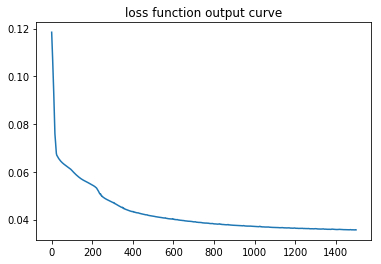

In [7]:
epoch = 1500
pltX, pltY = [], []
for e in range(epoch):
    pltX.append(e)
    Input = cudAvl(Variable(digTensor))
    Target = cudAvl(Variable(digTensor))
    _, Output = net(Input)
    loss = criterion(Output,Target)
    print_loss = loss.data[0]
    pltY.append(print_loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 100 == 0:
        print('epoch [%s/%s]: %s' %(e + 1, epoch, print_loss))

plt.title('loss function output curve')
plt.plot(pltX, pltY)
plt.show()

In [8]:
net.eval()

from PIL import  Image
import numpy as np

def getImage(matrix):
    dig = np.array(matrix.numpy()).reshape((28, 28))
    digImg = Image.fromarray(dig * 255)
    digImg = digImg.convert('L')
    return digImg

def compare(matrix):
    before = getImage(matrix)
    plt.subplot(121)
    plt.title('before encoding')
    plt.imshow(before)
    
    matrix = matrix.unsqueeze(0)
    In = cudAvl(Variable(matrix))
    code, Out = net(In)
    if torch.cuda.is_available():
        Out = Out.cpu()
    after = getImage(Out.data)
    
    plt.subplot(122)
    plt.title('after encoding')
    plt.imshow(after)
    print(code)

image index = 36321 , number =  7 

Variable containing:
 16.3739   4.2254  -0.1466
[torch.cuda.FloatTensor of size 1x3 (GPU 0)]



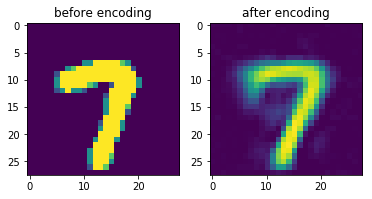

In [9]:
import random
index = random.randint(0, digTensor.shape[0])
print('image index =', index, ', number = ', label[index], '\n')
compare(digTensor[index])

效果还不错~